In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_linnerud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Load the Linnerud dataset
linnerud = load_linnerud()
# 20 examples, 3 independent variables, 3 targets
# Extract the 'waist' and 'situps' columns as the features and target variables, reshape to 2D array, single colum x
# y first column target values
X = linnerud.data[:, 0].reshape(-1, 1)
y = linnerud.target[:, 0].reshape(-1, 1)


In [90]:

# Split the dataset into training and testing sets, with 20% of the data for testing, 80% for training - Pareto
# Set the random state to 42 so that the results are reproducible, dataset is too small for this to matter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model on the training set
lr = LinearRegression()
lr.fit(X,y)
# lr.fit(X_train, y_train)

# Predict the target variable for the testing set using the trained model
y_pred_lr = lr.predict(X)
# y_pred_lr = lr.predict(X_test)


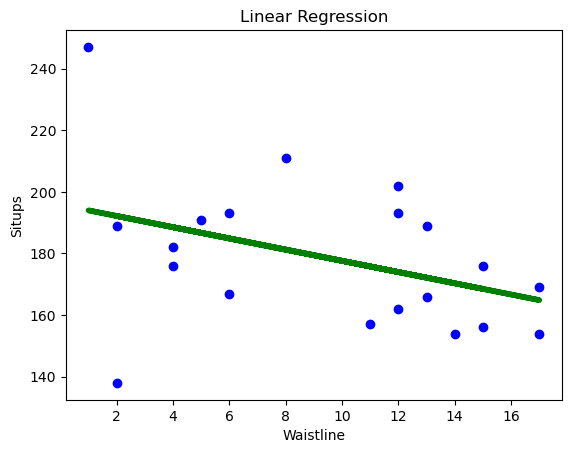

In [91]:

# Plot the predicted values against the actual values to visualize the relationship between the waistline and situps
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred_lr, color='green', linewidth=4)

# plt.scatter(X_test, y_test, color='blue')
# plt.plot(X_test, y_pred_lr, color='green', linewidth=4)
plt.title('Linear Regression')
plt.xlabel('Waistline')
plt.ylabel('Situps')
plt.show()


In [92]:

# evaluate performance of the model, metrics - mean-squared error of the linear regression model
mse_lr = mean_squared_error(y, y_pred_lr);
print('mean squared error (Linear Regression):', mse_lr)
# mean squared error (Linear Regression): 491.1911385252847

mse = np.sqrt(mse_lr)
mse_percent = mse/np.mean(y_pred_lr)*100
print(f'Mean error: {mse:3.3} ({mse_percent:3.3}%)')
# Mean error: 22.2 (12.4%)

# mse_lr = mean_squared_error(y_test, y_pred_lr)
# print('mean squared error y_test (Linear Regression):', mse_lr)
# mean squared error y_test (Linear Regression): 297.53754573193606

mean squared error (Linear Regression): 491.1911385252847
Mean error: 22.2 (12.4%)


In [93]:
# Polynomial features class with 2 degree, quadratic polynomial
# sort data by the input feature
sort_idx = X[:, 0].argsort()
X = X[sort_idx]
y = y[sort_idx]

poly = PolynomialFeatures(degree=2)
# transform into polynomial feature matrix
X_poly = poly.fit_transform(X)

# X_poly_train = poly.fit_transform(X_train)
# X_poly_test = poly.transform(X_test)


In [94]:

# train a polynomial regression model on the training set to learn a quadratic relationship between the waistline and situps
pr = LinearRegression()
pr.fit(X_poly, y)
# pr.fit(X_poly_train, y_train)
# Predict the target variable for the testing set using the trained model
y_pred_pr = pr.predict(X_poly)

# y_pred_pr = pr.predict(X_poly_test)

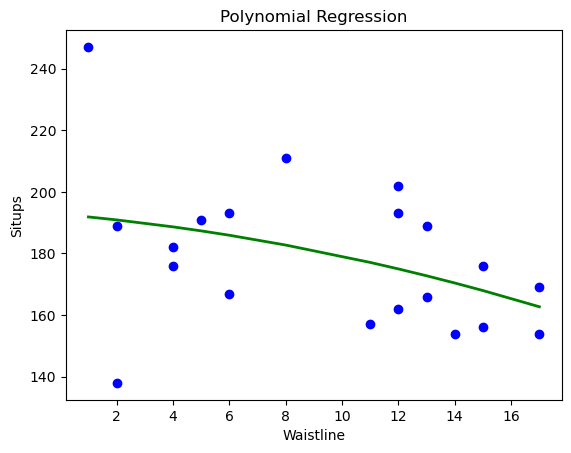

In [95]:



# Plot the predicted values against the actual values to visualize the relationship between the waistline and situps
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred_pr, color='green', linewidth=2)

# plt.scatter(X_test, y_test, color='blue')
# plt.plot(X_test, y_pred_pr, color='green', linewidth=2)
plt.title('Polynomial Regression')
plt.xlabel('Waistline')
plt.ylabel('Situps')
plt.show()


In [96]:

# evaluate performance of the model, metrics - mean-squared error of the polynomial regression model
mse_pr = mean_squared_error(y, y_pred_pr)
print('mean squared error (Polynomial Regression):', mse_pr)
# mean squared error (Polynomial Regression): 489.7925996899572
# higher MSE with linear regression, polynomial regression is more accurate.
mse2 = np.sqrt(mse_pr)
mse2_percent = mse2/np.mean(y_pred_pr)*100
print(f'Mean error: {mse2:3.3} ({mse2_percent:3.3}%)')
# Mean error: 22.1 (12.4%)

# mse_pr = mean_squared_error(y_test, y_pred_pr)
# print('mean squared error y_test (Polynomial Regression):', mse_pr)


mean squared error (Polynomial Regression): 489.7925996899572
Mean error: 22.1 (12.4%)
